In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [21]:
import seaborn as sns
import pandas as pd
import scipy.stats
import statsmodels.api as sm

In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

**A boxplot of the median value of owner-occupied homes in $1000s**

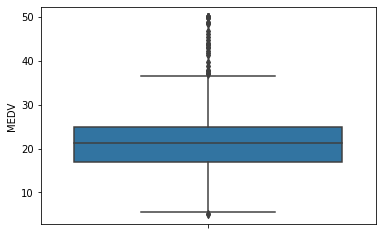

In [9]:
median = sns.boxplot(y='MEDV', data= boston_df) 

*Histogram of the tracts of land bordering the Charles River*

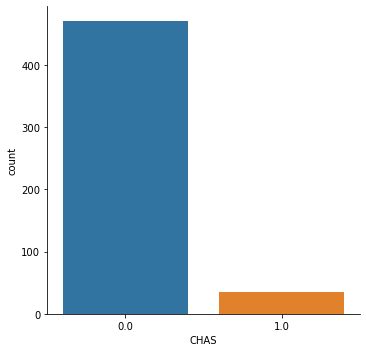

In [4]:
border = sns.catplot(x='CHAS', kind='count', data=boston_df)

A boxplot of the Median value of owner occupied homes and age

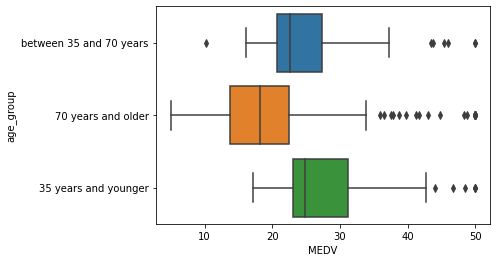

In [19]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
sns.boxplot(x='MEDV', y = 'age_group', data=boston_df)

In [ ]:
The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town is linear.

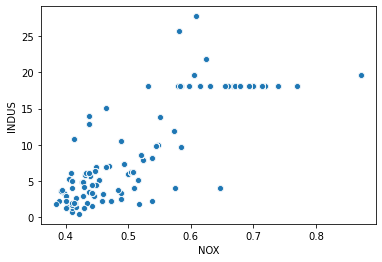

In [12]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df) 

A histogram of the pupil to teacher ratio

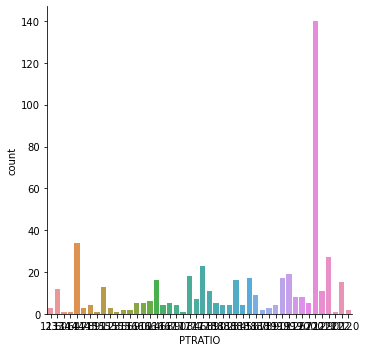

In [15]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df)

Hypothesis there is no difference in the value of the houses bounded by the Charles river

In [12]:
scipy.stats.ttest_ind(boston_df["MEDV"],
                   boston_df["CHAS"])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

Conclusion since the pvalue is above .05, we accept the hypothesis.  There is no difference in value of the houses bound by the Charles river

In [ ]:
Hypothesis: The means are equal

In [17]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: the pvalue is less than .05, the means differ

Hypothesis: There is no correlation between Nitric Oxide concentration and proportion of non retail business acres per town

In [18]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

Conclusion : since the pvalue is less than .05, we reject the hypothesis.  
There is a correlation between Nitric Oxide concentration and proportion of non retail business acres per town

Hypothesis: Weighted distance to the five employment centres has no effect on the median values of owner occupied homes

In [22]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           1.21e-08
Time:                        17:13:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Conclusion:The pvalue is less than .05 so we reject our hypothesis.  
Additional distance to employment centers does affect median home values